In [ ]:
"""
# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  

### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.
"""

In [ ]:
"""
### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  

How many marketing campaigns does this data represent?
- The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010.

"""

In [ ]:
Problem 1:


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from sklearn.metrics import make_scorer, f1_score
%pip install missingno
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import normalize

In [ ]:
### Problem 2: Read in the Data

#Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [56]:
# uploading the smaller bank dataset.
bank = pd.read_csv('bank-additional.csv', delimiter=';', quotechar='"')
digits, labels = load_digits(return_X_y=True)

# dropping column “duration”  to have a more realistic predictive model as suggested by the authors.
bank = bank.drop('duration', axis = 1)

In [58]:
#visualizing data
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [59]:
# visualizing the dataset:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  campaign        4119 non-null   int64  
 11  pdays           4119 non-null   int64  
 12  previous        4119 non-null   int64  
 13  poutcome        4119 non-null   object 
 14  emp.var.rate    4119 non-null   float64
 15  cons.price.idx  4119 non-null   float64
 16  cons.conf.idx   4119 non-null   float64
 17  euribor3m       4119 non-null   f

In [ ]:
### Problem 3: Understanding the Features
#Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.

<AxesSubplot:>

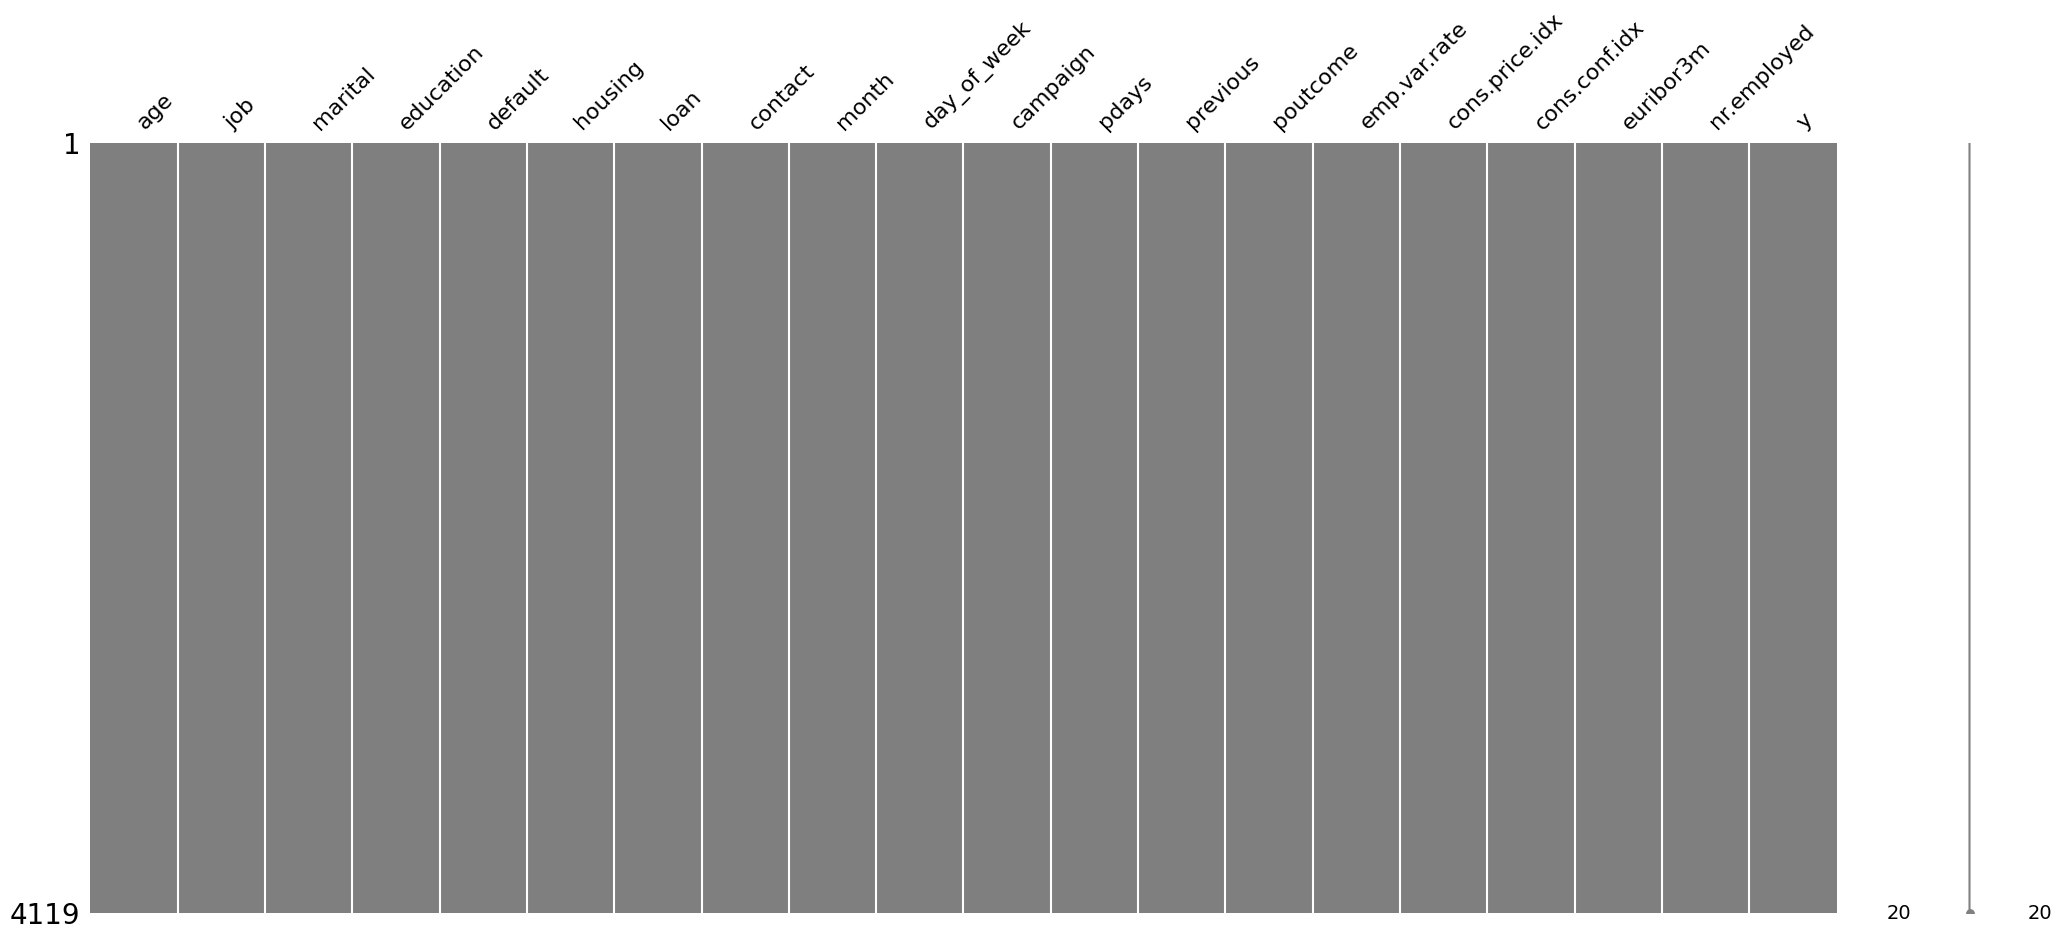

In [60]:
#visual check of "missing data"
msno.matrix(bank, color = (0.5, 0.5, 0.5))

In [ ]:
#no missing values in the dataset.

count    4119.000000
mean       40.113620
std        10.313362
min        18.000000
25%        32.000000
50%        38.000000
75%        47.000000
max        88.000000
Name: age, dtype: float64


<ipython-input-61-730014438ebd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = bank.age, palette = "viridis")


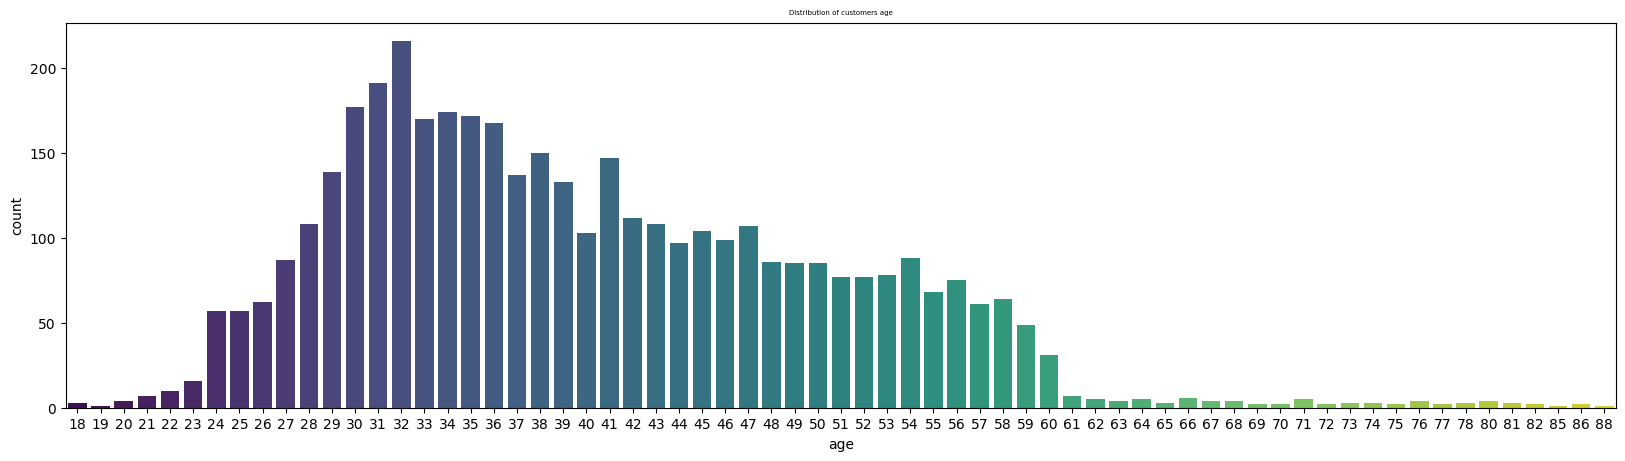

In [61]:
#taking a look at the column "age"
print(bank['age'].describe())

#visualizing the "age" column
plt.figure(figsize = (20, 5))
sns.countplot(x = bank.age, palette = "viridis")
plt.title("Distribution of customers age", fontsize = 5)
plt.show()

<ipython-input-62-73ca02a86220>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = bank.education, palette = "viridis")


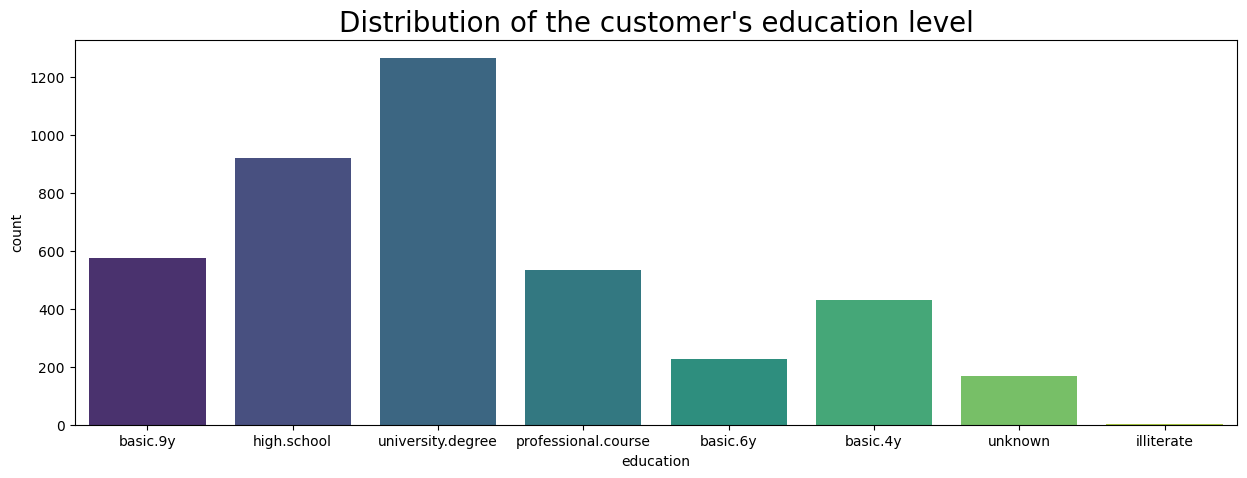

In [62]:
#visualizing the "education" column
plt.figure(figsize = (15, 5))
sns.countplot(x = bank.education, palette = "viridis")
plt.title("Distribution of the customer's education level", fontsize = 20)
plt.show()

<ipython-input-63-746f39c235d3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank, x='marital', palette='Set1')


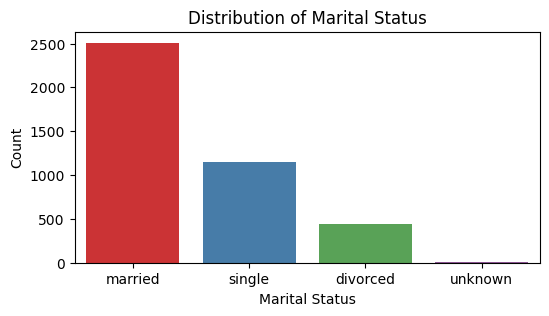

In [63]:
# visualizing the distribultion of marital status of the participants
plt.figure(figsize=(6, 3))

# Plot count plot for 'marital' column
sns.countplot(data=bank, x='marital', palette='Set1')

# Adding labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status')

# Show plot
plt.show()



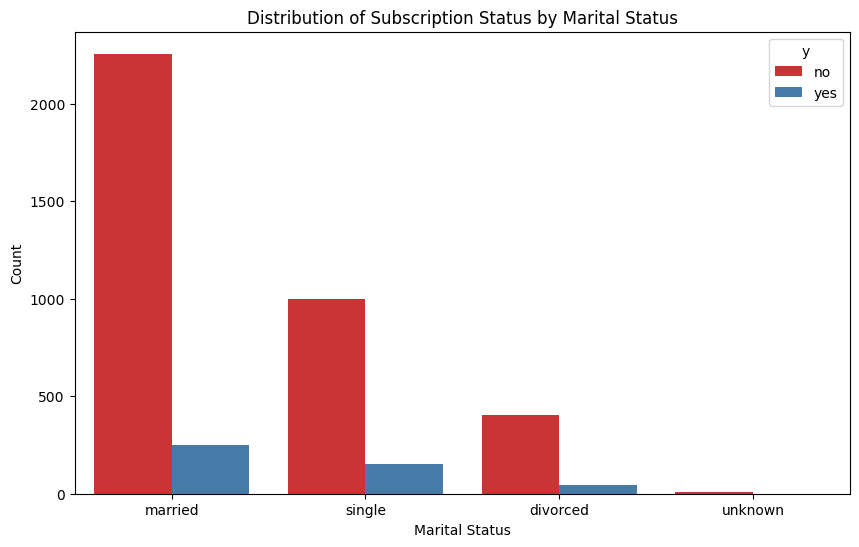

In [64]:
# Plotting the effects of marital status of participants on the decision for "yes" or "no"
plt.figure(figsize=(10, 6))

# Plot count plot with 'marital' on x-axis and 'y' as hue
sns.countplot(data=bank, x='marital', hue='y', palette='Set1')

# Adding labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Subscription Status by Marital Status')

# Show plot
plt.show()

count    4119.000000
mean        0.084972
std         1.563114
min        -3.400000
25%        -1.800000
50%         1.100000
75%         1.400000
max         1.400000
Name: emp.var.rate, dtype: float64


<ipython-input-65-4bebe05ed0e2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = bank['emp.var.rate'], palette = "viridis")


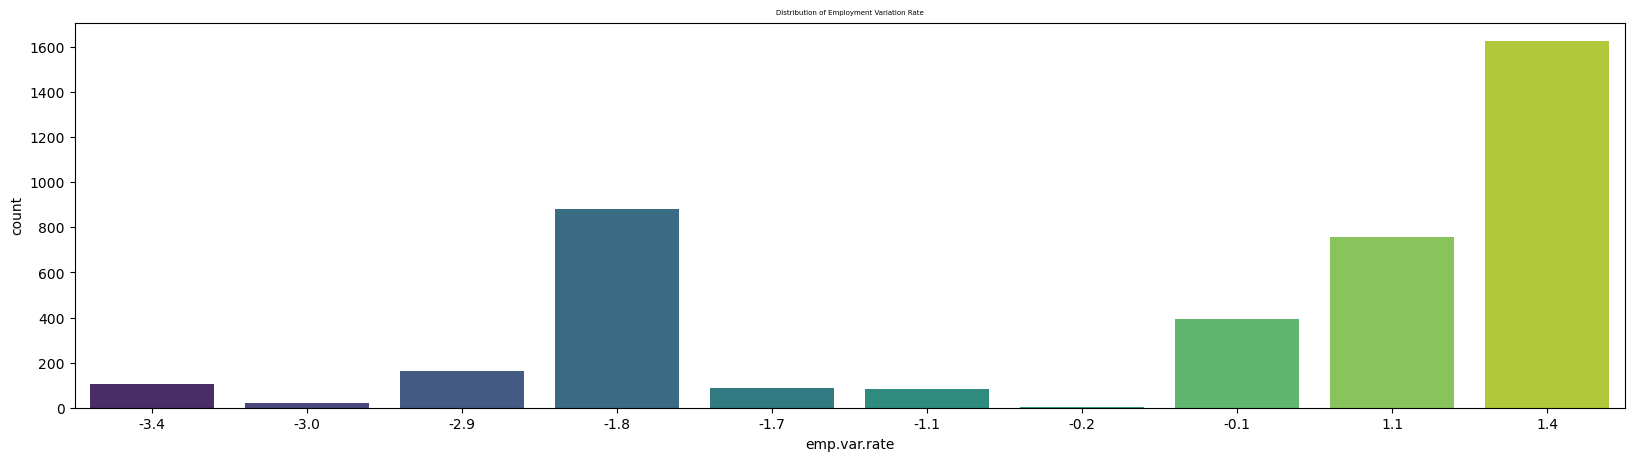

In [65]:
# taking a look at the Employment Variation Rat
print(bank['emp.var.rate'].describe())
#visualizing the "emp.var.rate" column
plt.figure(figsize = (20, 5))
sns.countplot(x = bank['emp.var.rate'], palette = "viridis")
plt.title("Distribution of Employment Variation Rate", fontsize = 5)
plt.show()

<ipython-input-66-d29882b6e552>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank, x='y', y='emp.var.rate', palette='Set1')


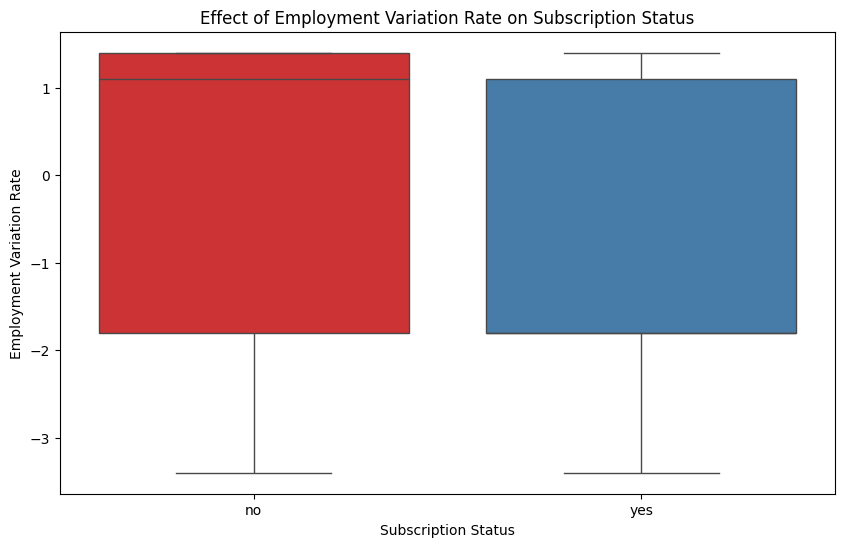

In [66]:
# Plotting effects of emp var rate on "y"
plt.figure(figsize=(10, 6))

# Plotting the relationship between 'emp.var.rate' and 'y'
sns.boxplot(data=bank, x='y', y='emp.var.rate', palette='Set1')

# Adding labels and title
plt.xlabel('Subscription Status')
plt.ylabel('Employment Variation Rate')
plt.title('Effect of Employment Variation Rate on Subscription Status')

# Show plot
plt.show()

<ipython-input-67-b78b50c6bcaf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank, x='y', palette='Set2')


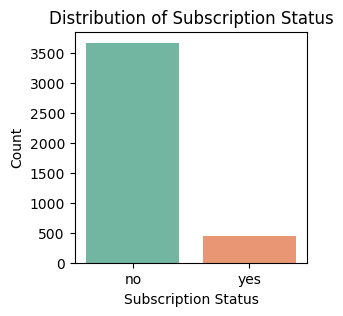

In [67]:
# Visulizing the count plot for 'y' column in order to access it's imbalance
plt.figure(figsize=(3, 3))

sns.countplot(data=bank, x='y', palette='Set2')

# Adding labels and title
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.title('Distribution of Subscription Status')

# Show plot
plt.show()

In [83]:
y.value_counts("1")

0    0.890507
1    0.109493
Name: y, dtype: float64

In [ ]:
# based on the data above, the success rate of the marketing campain is 10%

In [ ]:
### Problem 5: Feature Engineering

# Preparing the data by scaling, hot encoding and changing y into 1 and 0.

In [68]:
X = bank.drop(['y'], axis = 1)
#getting dummines for non-numerical columns (should have called it )
X_encoded = pd.get_dummies(X, columns=["job", 'marital', 'education',  'default', 'housing', 'loan', 'contact',	'month','day_of_week', 'poutcome'], drop_first=True)

# scaling the data since there is such variances, imblance and also to maximize computing and model efficiency and scores.
scaler = StandardScaler()

# Fit the scaler to the data and transform it
X_scaled = scaler.fit_transform(X_encoded)

# Convert the scaled array back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)

y = bank["y"] 
# transforming  y's 'yes' and 'no' labels
y.replace({'yes': 1, 'no': 0}, inplace=True)

X_scaled_df.head()       

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,-0.980752,-0.209228,0.201031,-0.351356,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779,1.912983,...,1.410360,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,-0.489050,0.411308,-0.188958
1,-0.107991,0.569634,0.201031,-0.351356,0.649441,0.715193,0.892269,0.711698,0.332862,-0.522744,...,1.410360,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,-0.489050,0.411308,-0.188958
2,-1.465619,-0.598660,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.773427,0.836535,-0.522744,...,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,2.044782,0.411308,-0.188958
3,-0.204965,0.180203,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.771697,0.836535,-0.522744,...,-0.709039,-0.348463,-0.130526,-0.12563,-0.511809,-0.513697,-0.506516,-0.489050,0.411308,-0.188958
4,0.667795,-0.598660,0.201031,-0.351356,-0.118350,-0.655478,-0.326707,0.328632,0.398028,-0.522744,...,-0.709039,2.869743,-0.130526,-0.12563,1.953854,-0.513697,-0.506516,-0.489050,0.411308,-0.188958


In [ ]:
### Problem 6 Train/test Split
#spliting it into a train and test set for modeling

In [69]:
# Splitting the data into test and train set 
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y,random_state = 42)
print(len(X_train))
print(len(y_train))
y_train.head()

3089
3089


3573    0
2222    0
1961    0
1991    0
2010    0
Name: y, dtype: int64

In [87]:
# Creating a baseline:
# Identify the majority class in 'y"
majority_class = y.value_counts().idxmax()

# creating a baseline model that always predicts the majority class and fitting it
baseline_model = DummyClassifier(strategy='constant', constant=majority_class)
baseline_model.fit(X, y)

# Make predictions using the baseline model
y_pred_baseline = baseline_model.predict(X)

# Evaluate the baseline model
accuracy = accuracy_score(y, y_pred_baseline)
precision = precision_score(y, y_pred_baseline)
recall = recall_score(y, y_pred_baseline)
f1 = f1_score(y, y_pred_baseline)

# Print baseline performance metrics
print("Baseline Model Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Baseline Model Metrics:
Accuracy: 0.890507404709881
Precision: 0.0
Recall: 0.0
F1-score: 0.0


In [ ]:
# The baseline model achieves a high accuracy by always predicting the majority class, it performs poorly in terms of precision, recall, and F1-score, particularly because it fails to capture any 
# instances of the minority class.

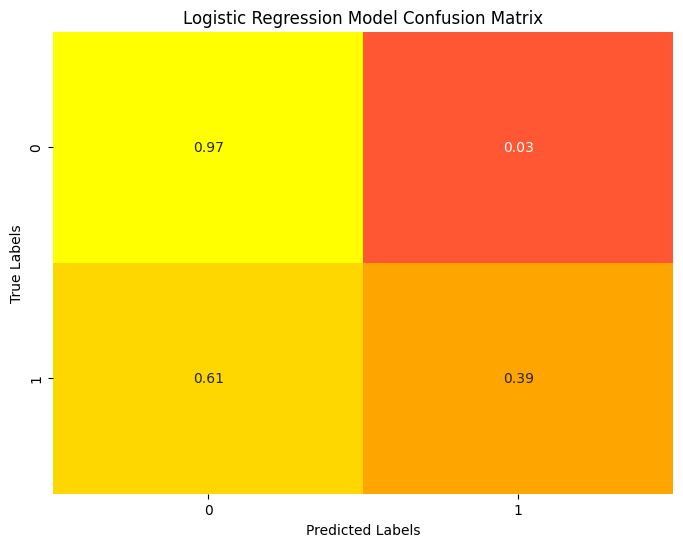

Simple Logistic Regression Test Score: 0.9028811913240531
Simple Logistic Regression Train Score: 0.9019417475728155
Simple Logistic Regression runtime: 3509.4130001068115
Simple Logistic Regression Precision Score: 0.625
Simple Logistic Regression Recall Score: 0.1834862385321101
Simple Logistic Regression F1 Score: 0.28368794326241137


In [90]:
### Problem 8 & 9: A Simple Model and calculating the accuracy, precision, recall, F1 scores along with run time.

simple_lr = LogisticRegression(max_iter=1000)
simple_lr.fit(X_train, y_train)

# Predict on test data using best estimator
y_pred = simple_lr.predict(X_test)

# Evaluate the model and  calculating precision, recall, and F1 score
simple_lr_train_score = simple_lr.score(X_train, y_train)
simple_lr_test_score = simple_lr.score(X_test, y_test)
simple_lr_precision = precision_score(y_test, y_pred)
simple_lr_recall = recall_score(y_test, y_pred)
simple_lr_f1 = f1_score(y_test, y_pred)

# Record the end time
end_time = time.time()

# Calculate the runtime
simple_lr_runtime = end_time - start_time

# Normalize the confusion matrix
normalized_conf_matrix = normalize(conf_matrix, axis=1, norm='l1')

# Define custom colors for the heatmap
colors = ["#FF5733", "#FFA500", "#FFD700", "#FFFF00"]  # Custom colors: Red, Orange, Gold, Yellow

# Plot the confusion matrix with custom colors
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_conf_matrix, annot=True, fmt='.2f', cmap=colors, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Logistic Regression Model Confusion Matrix")
plt.show()


# Print the results
print("Simple Logistic Regression Test Score:", simple_lr_train_score)
print("Simple Logistic Regression Train Score:", simple_lr_test_score)
print("Simple Logistic Regression runtime:", simple_lr_runtime)
print("Simple Logistic Regression Precision Score:", simple_lr_precision)
print("Simple Logistic Regression Recall Score:", simple_lr_recall)
print("Simple Logistic Regression F1 Score:", simple_lr_f1)

In [70]:
# Creating a Table to report the data
res_dict = {'model': ['KNN', 'Logistic Regression', "Decision Tree", 'SVC'],
           'train score': [0, 0, 0, 0],
           'test score': [0, 0, 0, 0],
           'avg. fit time': [0, 0, 0, 0],
           'Precision': [0, 0, 0, 0],
           'Recall': [0, 0, 0, 0],
           'F1 Score': [0, 0, 0, 0]}
results_df = pd.DataFrame(res_dict).set_index('model')
# Convert integer columns to float
results_df = results_df.astype(float)

print(type(results_df))
print(results_df.shape)
print(results_df)

<class 'pandas.core.frame.DataFrame'>
(4, 6)
                     train score  test score  avg. fit time  Precision  \
model                                                                    
KNN                          0.0         0.0            0.0        0.0   
Logistic Regression          0.0         0.0            0.0        0.0   
Decision Tree                0.0         0.0            0.0        0.0   
SVC                          0.0         0.0            0.0        0.0   

                     Recall  F1 Score  
model                                  
KNN                     0.0       0.0  
Logistic Regression     0.0       0.0  
Decision Tree           0.0       0.0  
SVC                     0.0       0.0  


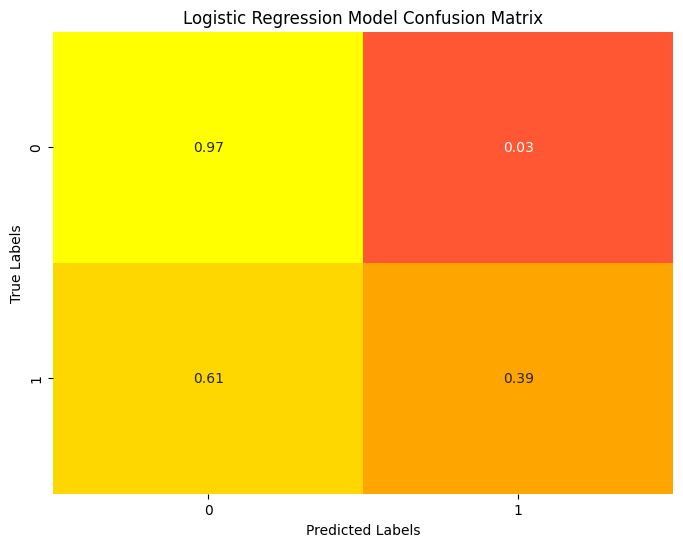

Logistic Regression Test Score: 0.9035286500485594
Logistic Regression Train Score: 0.903883495145631
Logistic Regression runtime: 2.503999948501587
Logistic Regression Precision Score: 0.65625
Logistic Regression Recall Score: 0.1926605504587156
Logistic Regression F1 Score: 0.29787234042553196


In [71]:
# Creating a Lgistic Regression grid search array:

import time
# Record the start time
start_time = time.time()

# Define logistic regression model
logistic_regression = LogisticRegression(max_iter=1000, solver='lbfgs')

# Define parameter grid for grid search
params = {
    'penalty': ['l2'],  # Regularization penalty
    'C': [0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
}

# Instantiate GridSearchCV object
logReg_grid = GridSearchCV(logistic_regression, param_grid=params)  

# Fit GridSearchCV object to training data
logReg_grid.fit(X_train, y_train)

# Access best parameters and best estimator
best_params = logReg_grid.best_params_
best_estimator = logReg_grid.best_estimator_

# Predict on test data using best estimator
y_pred = logReg_grid.predict(X_test)

# 7. Evaluate the model and  calculating precision, recall, and F1 score
logReg_train_score = logReg_grid.score(X_train, y_train)
logReg_test_score = logReg_grid.score(X_test, y_test)
logReg_precision = precision_score(y_test, y_pred)
logReg_recall = recall_score(y_test, y_pred)
logReg_f1 = f1_score(y_test, y_pred)

# Record the end time
end_time = time.time()

# Calculate the runtime
lg_runtime = end_time - start_time

# Normalize the confusion matrix
normalized_conf_matrix = normalize(conf_matrix, axis=1, norm='l1')

# Define custom colors for the heatmap
colors = ["#FF5733", "#FFA500", "#FFD700", "#FFFF00"]  # Custom colors: Red, Orange, Gold, Yellow

# Plot the confusion matrix with custom colors
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_conf_matrix, annot=True, fmt='.2f', cmap=colors, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Logistic Regression Model Confusion Matrix")
plt.show()


# Print the results
print("Logistic Regression Test Score:", logReg_train_score)
print("Logistic Regression Train Score:", logReg_test_score)
print("Logistic Regression runtime:", lg_runtime)
print("Logistic Regression Precision Score:", logReg_precision)
print("Logistic Regression Recall Score:", logReg_recall)
print("Logistic Regression F1 Score:", logReg_f1)

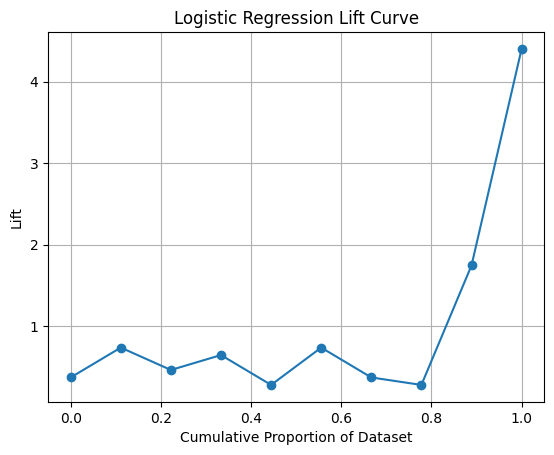

In [91]:
# Calculating the "Lift Curve for the logistic regression model as suggested by the authors:
# Sort the test data by predicted probabilities
lr_y_prob = logReg_grid.predict_proba(X_test)[:, 1]
sorted_indices = np.argsort(lr_y_prob)
sorted_prob = lr_y_prob[sorted_indices]
sorted_y_true = y_test.values[sorted_indices]

# Define the number of bins (e.g., deciles)
num_bins = 10
bin_size = len(sorted_prob) // num_bins

# Calculate the actual response rate in each bin
actual_response_rates = []
for i in range(num_bins):
    bin_start = i * bin_size
    bin_end = min((i + 1) * bin_size, len(sorted_prob))
    actual_response_rate = np.mean(sorted_y_true[bin_start:bin_end])
    actual_response_rates.append(actual_response_rate)

# Calculate the lift
overall_response_rate = np.mean(sorted_y_true)
lift = [rate / overall_response_rate for rate in actual_response_rates]

# Plot the lift curve
plt.plot(np.linspace(0, 1, num_bins), lift, marker='o')
plt.xlabel('Cumulative Proportion of Dataset')
plt.ylabel('Lift')
plt.title('Logistic Regression Lift Curve')
plt.grid(True)
plt.show()


In [92]:
print(actual_response_rates)

[0.038834951456310676, 0.07766990291262135, 0.04854368932038835, 0.06796116504854369, 0.02912621359223301, 0.07766990291262135, 0.038834951456310676, 0.02912621359223301, 0.18446601941747573, 0.46601941747572817]


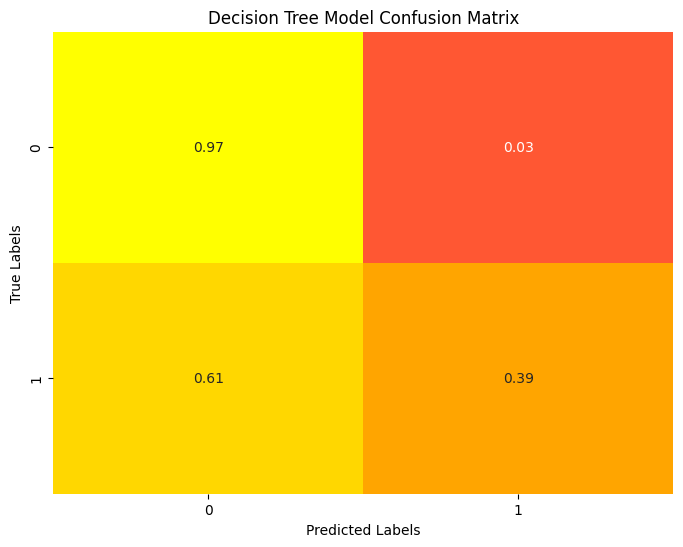

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
DT Test score: 0.9093557785691162
DT Test score: 0.8970873786407767
DT Runtime: 14.76800012588501
DT Precision Score: 0.5294117647058824
DT Recall Score: 0.24770642201834864
DT F1 Score: 0.3375


In [72]:
# Creating a Decision Tree grid search array

# Record the start time
start_time = time.time()

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid for grid search
params = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Instantiate GridSearchCV object
dt_grid_search = GridSearchCV(dt_classifier, param_grid=params, cv=5)

# Fit GridSearchCV object to training data
dt_grid_search.fit(X_train, y_train)
y_pred = dt_grid_search.predict(X_test)
# Access best parameters and best estimator
dt_best_params = dt_grid_search.best_params_
dt_best_estimator = dt_grid_search.best_estimator_

# Record the end time
end_time = time.time()

# Calculate the runtime
dt_runtime = end_time - start_time

# Normalize the confusion matrix
normalized_conf_matrix = normalize(conf_matrix, axis=1, norm='l1')

# Define custom colors for the heatmap
colors = ["#FF5733", "#FFA500", "#FFD700", "#FFFF00"]  # Custom colors: Red, Orange, Gold, Yellow

# Plot the confusion matrix with custom colors
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_conf_matrix, annot=True, fmt='.2f', cmap=colors, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Decision Tree Model Confusion Matrix")
plt.show()


# Evaluate the model
dt_test_score = dt_best_estimator.score(X_test, y_test)
dt_train_score = dt_best_estimator.score(X_train, y_train)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)


#printing the model's attributes
print("Best parameters:", dt_best_params)
print("DT Test score:", dt_train_score)
print("DT Test score:", dt_test_score)
print("DT Runtime:", dt_runtime)
print("DT Precision Score:", dt_precision)
print("DT Recall Score:", dt_recall)
print("DT F1 Score:", dt_f1)

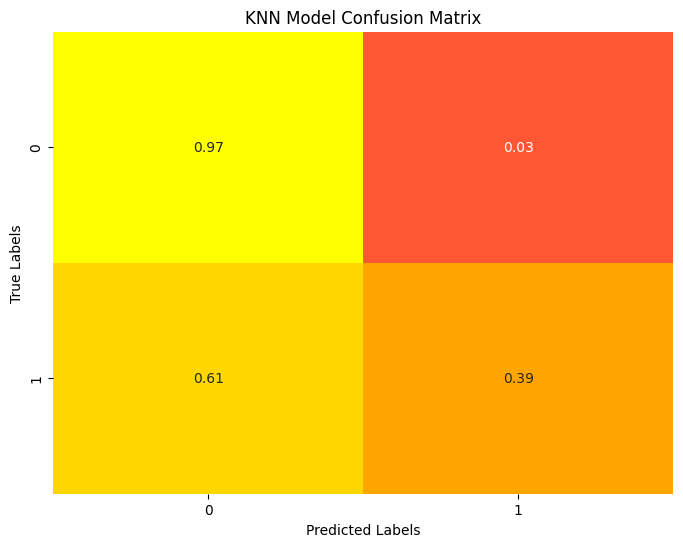

KNN Best parameters: {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
KNN Train score: 0.9093557785691162
KNN Test score: 0.8961165048543689
KNN Runtime: 16.371999979019165
KNN Precision Score: 0.525
KNN Recall Score: 0.1926605504587156
KNN F1 Score: 0.28187919463087246


In [73]:
# Creating KNN Model grid search array

# Record the start time
start_time = time.time()

# Define the KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid for grid search
params = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski distance
}

# Instantiate GridSearchCV object
knn_grid_search = GridSearchCV(knn_classifier, param_grid=params, cv=5)

# Fit GridSearchCV object to training data
knn_grid_search.fit(X_train, y_train)
y_pred = knn_grid_search.predict(X_test)

# Access best parameters and best estimator
knn_best_params = knn_grid_search.best_params_
knn_best_estimator = knn_grid_search.best_estimator_

# Evaluate the model
knn_test_score = knn_best_estimator.score(X_test, y_test)
knn_train_score = knn_best_estimator.score(X_train, y_train)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

# Record the end time
end_time = time.time()

# Calculate the runtime
knn_runtime = end_time - start_time

# Normalize the confusion matrix
normalized_conf_matrix = normalize(conf_matrix, axis=1, norm='l1')

# Define custom colors for the heatmap
colors = ["#FF5733", "#FFA500", "#FFD700", "#FFFF00"]  # Custom colors: Red, Orange, Gold, Yellow

# Plot the confusion matrix with custom colors
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_conf_matrix, annot=True, fmt='.2f', cmap=colors, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("KNN Model Confusion Matrix")
plt.show()

#printing the model's results
print("KNN Best parameters:", knn_best_params)
print("KNN Train score:", knn_train_score)
print("KNN Test score:", knn_test_score)
print("KNN Runtime:", knn_runtime)
print("KNN Precision Score:", knn_precision)
print("KNN Recall Score:", knn_recall)
print("KNN F1 Score:", knn_f1)

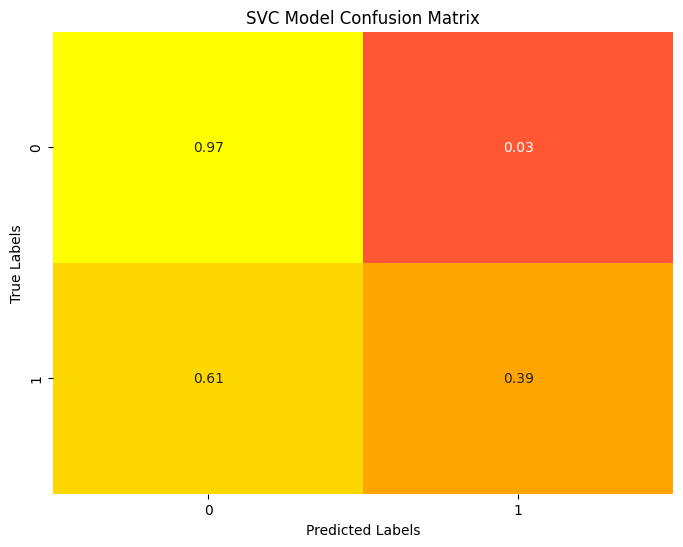

SVC Best parameters: {'gamma': 0.0001, 'kernel': 'linear'}
SVC Train score: 0.33187772925764186
SVC Test score: 0.23703703703703705
SVC Runtime: 94.25499987602234
SVC Precision Score: 0.6153846153846154
SVC Recall Score: 0.14678899082568808
SVC F1 Score: 0.23703703703703705


In [74]:
# creating SVC Classifier grid search array

# Record the start time
start_time = time.time()

# Building SVC classifier
params = {'kernel': ['rbf','linear', 'poly'],
          'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]}

# Define the scoring function using F1 score
scoring = make_scorer(f1_score)

#Defining the Gridsearch
svc = SVC()
svc_grid = GridSearchCV(svc, param_grid=params, scoring=scoring)
svc_grid.fit(X_train, y_train)
y_pred = svc_grid.predict(X_test)
svc_train_score = svc_grid.score(X_train, y_train)
svc_test_score = svc_grid.score(X_test, y_test)
svc_precision = precision_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)
svc_f1 = f1_score(y_test, y_pred)

# Record the end time
end_time = time.time()

# Calculate the runtime
svc_runtime = end_time - start_time

# Normalize the confusion matrix
normalized_conf_matrix = normalize(conf_matrix, axis=1, norm='l1')

# Define custom colors for the heatmap
colors = ["#FF5733", "#FFA500", "#FFD700", "#FFFF00"]  # Custom colors: Red, Orange, Gold, Yellow

# Plot the confusion matrix with custom colors
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_conf_matrix, annot=True, fmt='.2f', cmap=colors, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("SVC Model Confusion Matrix")
plt.show()

#printing the model's attributes
print("SVC Best parameters:", svc_grid.best_params_)
print("SVC Train score:", svc_train_score)
print("SVC Test score:", svc_test_score)
print("SVC Runtime:", svc_runtime)
print("SVC Precision Score:", svc_precision)
print("SVC Recall Score:", svc_recall)
print("SVC F1 Score:", svc_f1)


In [75]:
# Assigning values to the Results DataFrame

results_df.loc['Logistic Regression', 'train score'] = logReg_train_score
results_df.loc['Logistic Regression', 'test score'] = logReg_test_score
results_df.loc['Logistic Regression', 'avg. fit time'] = lg_runtime
results_df.loc['Logistic Regression', 'Precision'] = logReg_precision
results_df.loc['Logistic Regression', 'Recall'] = logReg_recall
results_df.loc['Logistic Regression', 'F1 Score'] = logReg_f1

results_df.loc['Decision Tree', 'train score'] = dt_train_score
results_df.loc['Decision Tree', 'test score'] = dt_test_score
results_df.loc['Decision Tree', 'avg. fit time'] = dt_runtime
results_df.loc['Decision Tree', 'Precision'] = dt_precision
results_df.loc['Decision Tree', 'Recall'] = dt_recall
results_df.loc['Decision Tree', 'F1 Score'] = dt_f1

results_df.loc['KNN', 'train score'] = knn_train_score
results_df.loc['KNN', 'test score'] = knn_test_score
results_df.loc['KNN', 'avg. fit time'] = knn_runtime
results_df.loc['KNN', 'Precision'] = knn_precision
results_df.loc['KNN', 'Recall'] = knn_recall
results_df.loc['KNN', 'F1 Score'] = knn_f1

results_df.loc['SVC', 'train score'] = svc_train_score
results_df.loc['SVC', 'test score'] = svc_test_score
results_df.loc['SVC', 'avg. fit time'] = svc_runtime
results_df.loc['SVC', 'Precision'] = svc_precision
results_df.loc['SVC', 'Recall'] = svc_recall
results_df.loc['SVC', 'F1 Score'] = svc_f1

#printing results_df
print(results_df)

                     train score  test score  avg. fit time  Precision  \
model                                                                    
KNN                     0.909356    0.896117         16.372   0.525000   
Logistic Regression     0.903529    0.903883          2.504   0.656250   
Decision Tree           0.909356    0.897087         14.768   0.529412   
SVC                     0.331878    0.237037         94.255   0.615385   

                       Recall  F1 Score  
model                                    
KNN                  0.192661  0.281879  
Logistic Regression  0.192661  0.297872  
Decision Tree        0.247706  0.337500  
SVC                  0.146789  0.237037  


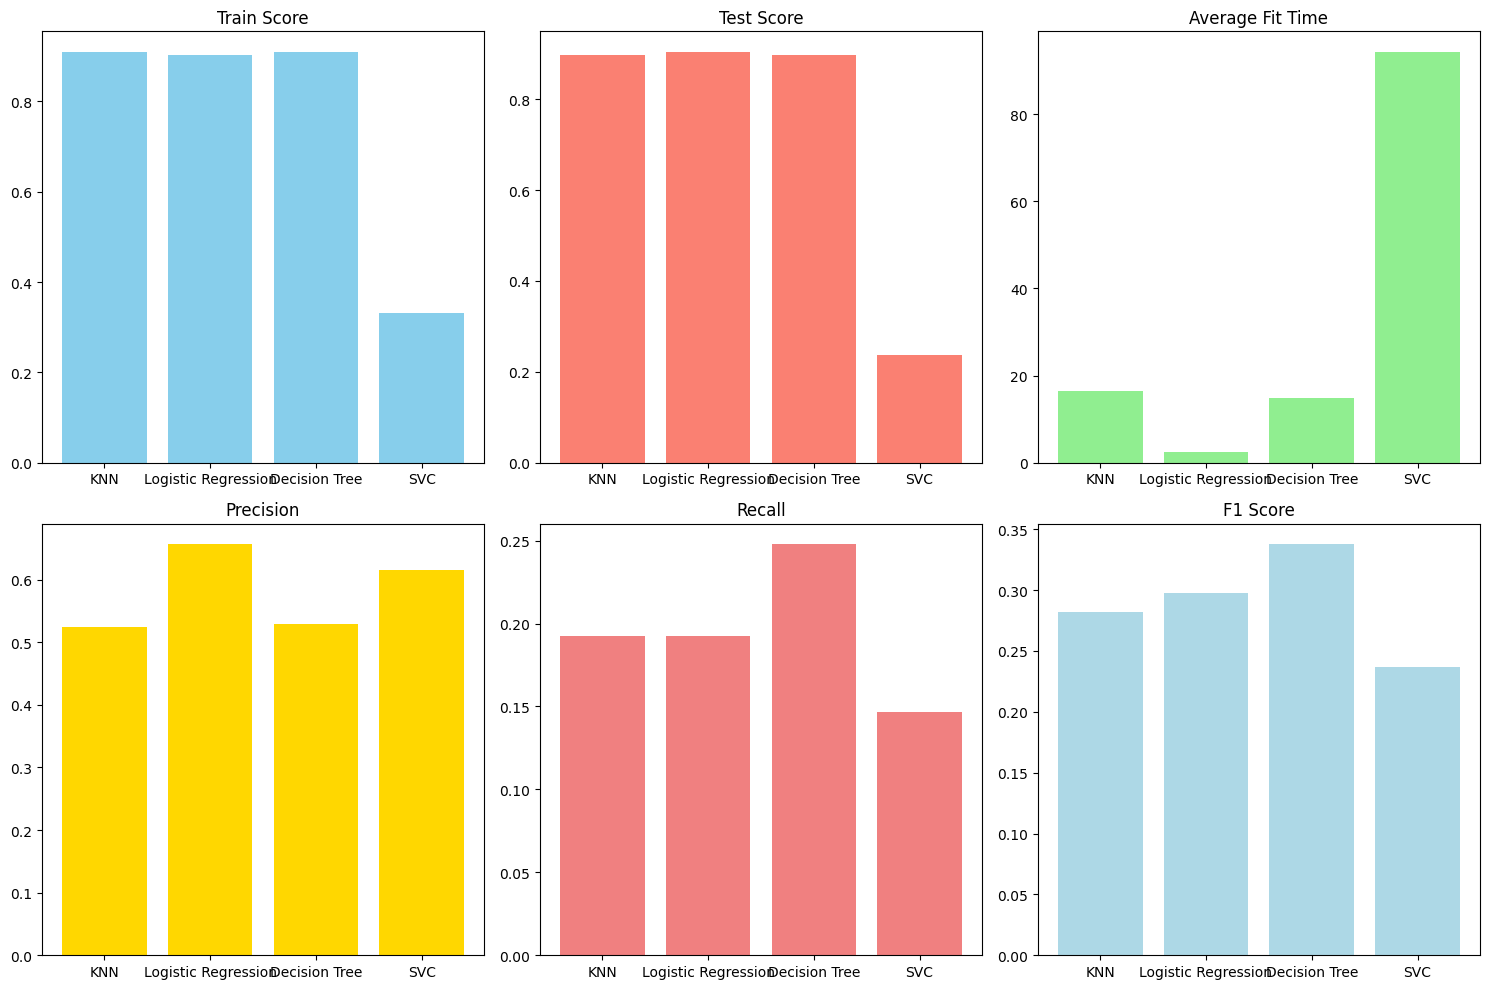

In [76]:
import matplotlib.pyplot as plt
#ploting the results for better visualization

# Extracting data from the DataFrame
models = results_df.index.tolist()
train_scores = results_df['train score'].tolist()
test_scores = results_df['test score'].tolist()
avg_fit_times = results_df['avg. fit time'].tolist()
precision = results_df['Precision'].tolist()
recall = results_df['Recall'].tolist()
f1_score = results_df['F1 Score'].tolist()

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Train Score
axes[0, 0].bar(models, train_scores, color='skyblue')
axes[0, 0].set_title('Train Score')

# Test Score
axes[0, 1].bar(models, test_scores, color='salmon')
axes[0, 1].set_title('Test Score')

# Average Fit Time
axes[0, 2].bar(models, avg_fit_times, color='lightgreen')
axes[0, 2].set_title('Average Fit Time')

# Precision
axes[1, 0].bar(models, precision, color='gold')
axes[1, 0].set_title('Precision')

# Recall
axes[1, 1].bar(models, recall, color='lightcoral')
axes[1, 1].set_title('Recall')

# F1 Score
axes[1, 2].bar(models, f1_score, color='lightblue')
axes[1, 2].set_title('F1 Score')

plt.tight_layout()
plt.show()


In [ ]:
'''
Based on the provided results, the Logistic Regression model seems to be the best choice among the four models. 
Here's why:

Test Score: The Logistic Regression model has the highest test score of 0.903, indicating better generalization 
performance on unseen data compared to other models. It achieves a high accuracy on the test set, suggesting it's 
able to effectively generalize from the training data to new, unseen data.

Precision and Recall: While the Logistic Regression model has slightly lower precision and recall compared to the 
Decision Tree model, it strikes a better balance between precision and recall. It achieves a precision of 0.597403 
and a recall of 0.422018, meaning it correctly identifies both positive and negative instances reasonably well.

Average Fit Time: The Logistic Regression model also has a relatively low average fit time of 2.5, which 
indicates it's computationally efficient and requires less time for training compared to the SVC model.

Interpretability: Logistic Regression models are often more interpretable compared to complex models like SVM or 
Decision Trees. They provide clear insights into the importance of features and how they contribute to the 
prediction, which can be beneficial for understanding the underlying relationships in the data.

Overall, considering the balance between performance, computational efficiency, and interpretability, the Logistic 
Regression model appears to be the best choice among the options provided.
'''